In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

# Data Exploration and Pre-Processing for BC

In [42]:
df = pd.read_excel('WonderfulWinesoftheWorld.xlsx', index_col=0)

In [43]:
df.index.isna().sum()


1

In [44]:
df

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
5325.0,653.000,55.0000,20.0000,78473.000,20.0000,18.0000,826.0000,445.0000,7.0000,67.0000,4.0000,26.0000,2.0000,1.0000,1.0000,36.0000,5.0000
3956.0,1041.000,75.0000,18.0000,105087.000,36.0000,33.0000,1852.0000,539.0000,2.0000,49.0000,0.0000,46.0000,1.0000,3.0000,0.0000,20.0000,4.0000
3681.0,666.000,18.0000,12.0000,27984.000,4.0000,56.0000,39.0000,-7.0000,88.0000,4.0000,29.0000,14.0000,32.0000,21.0000,48.0000,60.0000,8.0000
2829.0,1049.000,42.0000,16.0000,61748.000,2.0000,46.0000,37.0000,-6.0000,70.0000,86.0000,1.0000,11.0000,1.0000,1.0000,55.0000,59.0000,7.0000
8788.0,837.000,47.0000,16.0000,65789.000,2.0000,3.0000,36.0000,4.0000,35.0000,85.0000,0.0000,12.0000,2.0000,1.0000,28.0000,63.0000,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070.0,596.000,66.0000,15.0000,84714.000,18.0000,45.0000,720.0000,391.0000,5.0000,30.0000,12.0000,36.0000,10.0000,12.0000,13.0000,18.0000,2.0000
7909.0,619.000,18.0000,12.0000,40466.000,3.0000,65.0000,47.0000,5.0000,23.0000,6.0000,24.0000,10.0000,38.0000,22.0000,41.0000,58.0000,5.0000
4158.0,1107.000,33.0000,16.0000,53661.000,1.0000,368.0000,15.0000,2.0000,35.0000,18.0000,13.0000,45.0000,11.0000,13.0000,13.0000,60.0000,6.0000


In [4]:
df.head()

,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
Custid,,,,,,,,,,,,,,,,,
5325.0,653.0,55.0,20.0,78473.0,20.0,18.0,826.0,445.0,7.0,67.0,4.0,26.0,2.0,1.0,1.0,36.0,5.0
3956.0,1041.0,75.0,18.0,105087.0,36.0,33.0,1852.0,539.0,2.0,49.0,0.0,46.0,1.0,3.0,0.0,20.0,4.0
3681.0,666.0,18.0,12.0,27984.0,4.0,56.0,39.0,-7.0,88.0,4.0,29.0,14.0,32.0,21.0,48.0,60.0,8.0
2829.0,1049.0,42.0,16.0,61748.0,2.0,46.0,37.0,-6.0,70.0,86.0,1.0,11.0,1.0,1.0,55.0,59.0,7.0
8788.0,837.0,47.0,16.0,65789.0,2.0,3.0,36.0,4.0,35.0,85.0,0.0,12.0,2.0,1.0,28.0,63.0,6.0


#### Missing Values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10001 entries, 5325.0 to nan
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dayswus      10001 non-null  float64
 1   Age          10001 non-null  float64
 2   Edu          10001 non-null  float64
 3   Income       10001 non-null  float64
 4   Freq         10001 non-null  float64
 5   Recency      10001 non-null  float64
 6   Monetary     10001 non-null  float64
 7   LTV          10001 non-null  float64
 8   Perdeal      10001 non-null  float64
 9   Dryred       10001 non-null  float64
 10  Sweetred     10001 non-null  float64
 11  Drywh        10001 non-null  float64
 12  Sweetwh      10001 non-null  float64
 13  Dessert      10001 non-null  float64
 14  Exotic       10001 non-null  float64
 15  WebPurchase  10001 non-null  float64
 16  WebVisit     10001 non-null  float64
dtypes: float64(17)
memory usage: 1.4 MB


No Missing Values 

#### Outliers

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dayswus,10001.0,898.1020,202.482664,550.0,724.0,894.0,1074.0,1250.0
Age,10001.0,47.9273,17.301856,18.0,33.0,48.0,63.0,78.0
Edu,10001.0,16.7391,1.876281,12.0,15.0,17.0,18.0,20.0
Income,10001.0,69904.3580,27610.852665,10000.0,47646.0,70009.0,92147.0,140628.0
Freq,10001.0,14.6281,11.968475,1.0,4.0,12.0,24.0,56.0
Recency,10001.0,62.4068,69.870762,0.0,26.0,52.0,78.0,549.0
Monetary,10001.0,622.5552,647.102966,6.0,63.0,383.0,1077.0,3052.0
LTV,10001.0,209.0712,291.971441,-178.0,-2.0,57.0,364.0,1791.0
Perdeal,10001.0,32.3972,27.895699,0.0,6.0,25.0,56.0,97.0
Dryred,10001.0,50.3827,23.452643,1.0,32.0,51.0,69.0,99.0


In [7]:
features = ['Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV',
        'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
        'Exotic', 'WebPurchase', 'WebVisit']

In [8]:
features

['Age',
 'Edu',
 'Income',
 'Freq',
 'Recency',
 'Monetary',
 'LTV',
 'Perdeal',
 'Dryred',
 'Sweetred',
 'Drywh',
 'Sweetwh',
 'Dessert',
 'Exotic',
 'WebPurchase',
 'WebVisit']

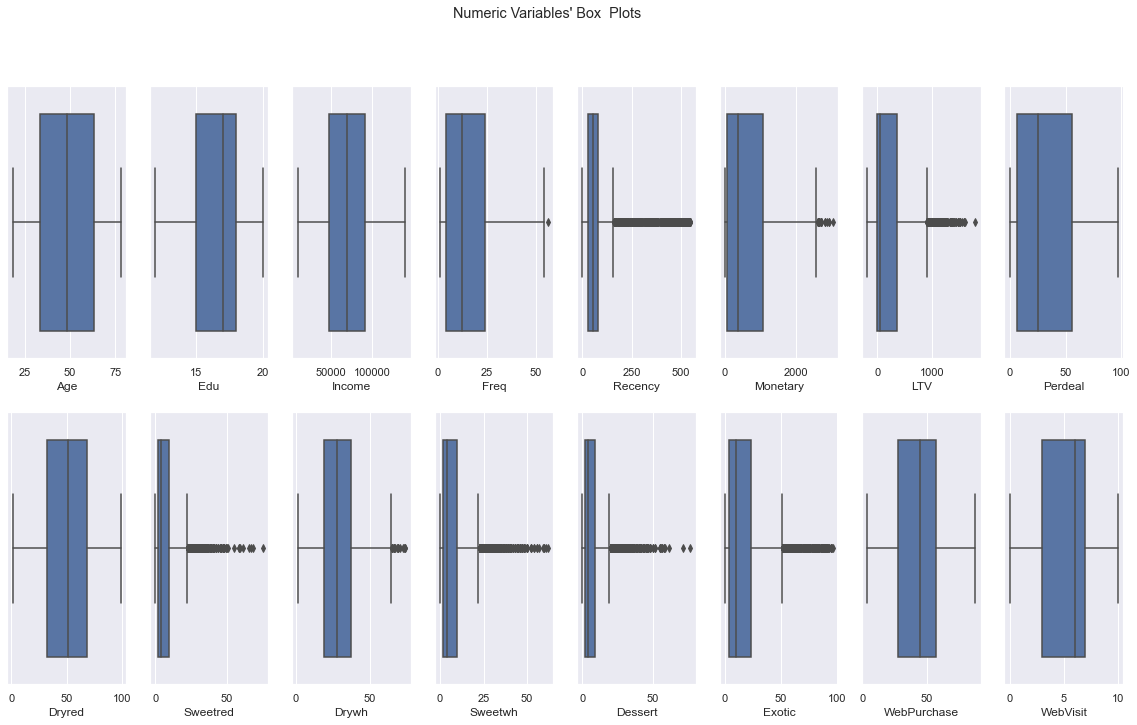

In [9]:
# All Numeric Variables' Box Plots in one figure
sns.set()


# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), features): 
    sns.boxplot(x=df[feat], ax=ax)

# Add a centered title to the figure:
title = "Numeric Variables' Box  Plots"

plt.suptitle(title)

plt.show()

# Customer segmentation

In [23]:
Customer_features = ['Age','Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal',
                    'WebVisit','WebPurchase']

In [24]:
df_customer = df[Customer_features]

In [25]:
Mon_by_freq = df_customer['Monetary'] / df_customer['Freq']
Mon_by_freq

Custid
5325.0    41.300000
3956.0    51.444444
3681.0     9.750000
2829.0    18.500000
8788.0    18.000000
            ...    
4070.0    40.000000
7909.0    15.666667
4158.0    15.000000
4914.0    45.920000
NaN       42.558856
Length: 10001, dtype: float64

In [26]:
df_customer['Mon_by_Purchase'] = Mon_by_freq

/var/folders/x8/rchg54g91cl4k7n26xkn8mq80000gn/T/ipykernel_21580/391831537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer['Mon_by_Purchase'] = Mon_by_freq


In [27]:
df_customer

,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,WebVisit,WebPurchase,Mon_by_Purchase
Custid,,,,,,,,,,,
5325.0,55.0000,20.0000,78473.000,20.0000,18.0000,826.0000,445.0000,7.0000,5.0000,36.0000,41.300000
3956.0,75.0000,18.0000,105087.000,36.0000,33.0000,1852.0000,539.0000,2.0000,4.0000,20.0000,51.444444
3681.0,18.0000,12.0000,27984.000,4.0000,56.0000,39.0000,-7.0000,88.0000,8.0000,60.0000,9.750000
2829.0,42.0000,16.0000,61748.000,2.0000,46.0000,37.0000,-6.0000,70.0000,7.0000,59.0000,18.500000
8788.0,47.0000,16.0000,65789.000,2.0000,3.0000,36.0000,4.0000,35.0000,6.0000,63.0000,18.000000
...,...,...,...,...,...,...,...,...,...,...,...
4070.0,66.0000,15.0000,84714.000,18.0000,45.0000,720.0000,391.0000,5.0000,2.0000,18.0000,40.000000
7909.0,18.0000,12.0000,40466.000,3.0000,65.0000,47.0000,5.0000,23.0000,5.0000,58.0000,15.666667
4158.0,33.0000,16.0000,53661.000,1.0000,368.0000,15.0000,2.0000,35.0000,6.0000,60.0000,15.000000
